<a href="https://colab.research.google.com/github/srijamannam/Olympic_Games/blob/main/Olympic_games_120_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Import Data**

In [ ]:
df1=pd.read_csv("/content/athlete_events.csv",engine='python')
df2=pd.read_csv("/content/noc_regions.csv")

# **Data Wrangling** 

In [ ]:
#Exploring the first dataset 
df1.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
df1.shape

(271116, 15)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
df1.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [ ]:
df1.drop("ID",axis=1,inplace=True)

# **Data Cleaning** 

In [ ]:
df1.isnull().sum()

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [ ]:
#filling the Null values
df1['Medal'].fillna('No Medal', inplace = True)

In [ ]:
df1["Age"].fillna((df1["Age"].mean()), inplace = True)
df1["Height"].fillna((df1["Height"].mean()), inplace = True)
df1["Weight"].fillna((df1["Weight"].mean()), inplace = True)

In [ ]:
df1.duplicated().sum()

1385

In [ ]:
#dropping duplicates
df1.drop_duplicates(keep='first',inplace= True)

In [ ]:
df1.duplicated().sum()

0

# **Exploratory Data Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb145fd550>,
      dtype=object)

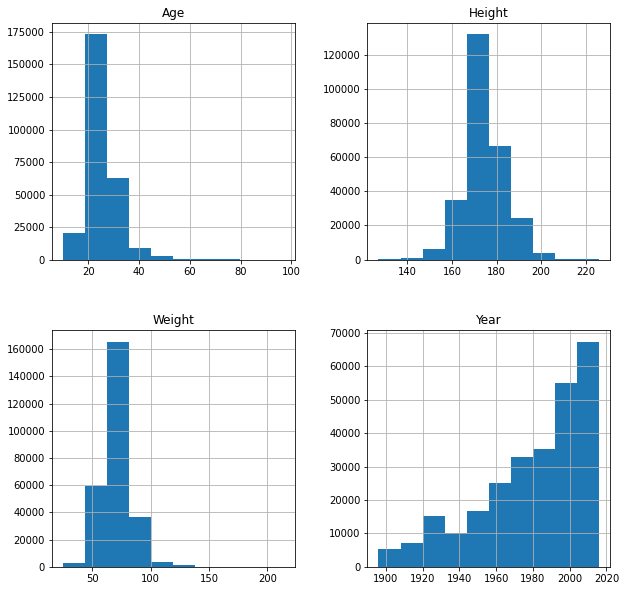

In [ ]:
df1.hist(figsize=(10,10))

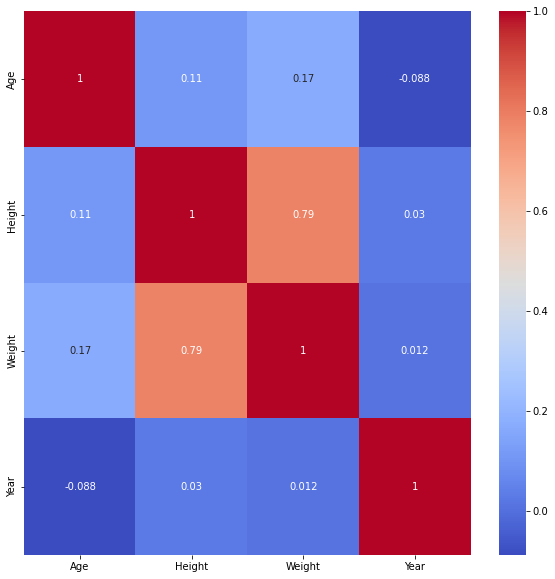

In [ ]:
corr1=df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr1,annot=True,cmap='coolwarm')

In [ ]:
#Exploring the second dataset 
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [ ]:
#Merging the two datasets 

df = df1.merge(df2,how='left',on="NOC")
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,NaN
1,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,NaN
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,NaN
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,NaN


In [ ]:
df.isnull().sum()

Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     264696
dtype: int64

In [ ]:
df.drop('notes',axis=1,inplace=True)

In [ ]:
df['region'].fillna((df['Team']),inplace=True)

In [ ]:
df.shape

(269731, 15)

# **Total Number of Medals**

In [ ]:
medal_counts=df.Medal.value_counts()
medal_counts

No Medal    229959
Gold         13369
Bronze       13295
Silver       13108
Name: Medal, dtype: int64

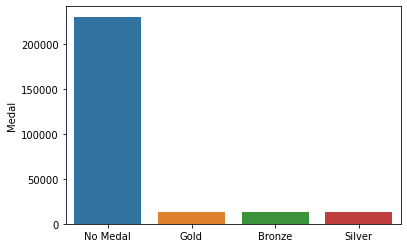

In [ ]:
sns.barplot(x=medal_counts.index,y=medal_counts)

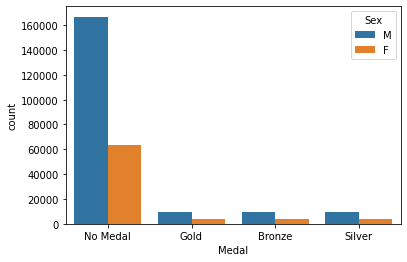

In [ ]:
#breaking down the medals won based on gender 

sns.countplot(data=df,x='Medal',hue='Sex')

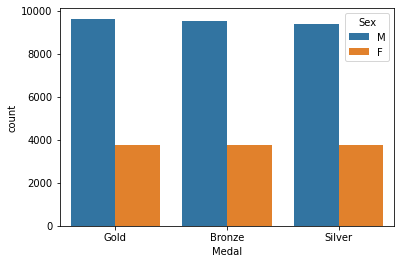

In [ ]:
df_medal = df[(df.Medal=='Gold') | (df.Medal=='Silver') | (df.Medal=='Bronze')]
sns.countplot(data=df_medal,x='Medal',hue='Sex')

# **Top 10 Countries Participating** 

In [ ]:
top_10_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

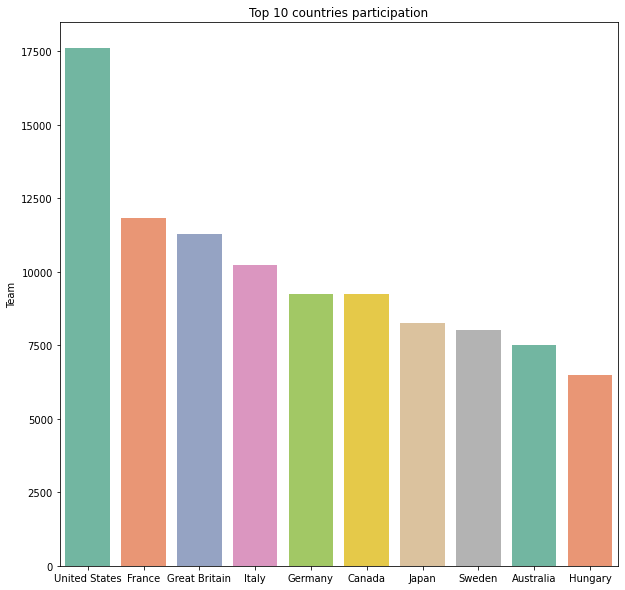

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Top 10 countries participation")
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette='Set2')
plt.show()

# **Countries with the highest Number of Gold Medals**

In [ ]:
df_gold_medal=df[df.Medal=="Gold"]

In [ ]:
country_gold_medals=df_gold_medal.groupby(['region'])['Medal'].count().reset_index(name="gold_medals").sort_values("gold_medals",ascending=False)

In [ ]:
country_gold_medals.head()

,region,gold_medals
91,USA,2638
72,Russia,1599
32,Germany,1301
90,UK,677
43,Italy,575


Text(0.5, 1.0, 'Top 5 countries with the highest number of gold medals')

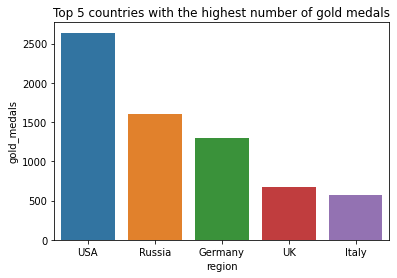

In [ ]:
sns.barplot(x="region",y="gold_medals",data=country_gold_medals.head())
plt.title("Top 5 countries with the highest number of gold medals")

## **top 10 countries with the highest percentage of female participation?**


In [ ]:
female_df=df[df.Sex=='F']
female_df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands
6,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands
7,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands
8,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [ ]:
female_pop_highest=female_df.groupby('region')['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False)
female_pop_highest

,region,Count
196,USA,5489
67,Germany,4844
152,Russia,4105
33,Canada,3563
195,UK,3263
...,...,...
167,Singapore-2,2
127,Nauru,2
194,Tuvalu,2
27,Brunei,2


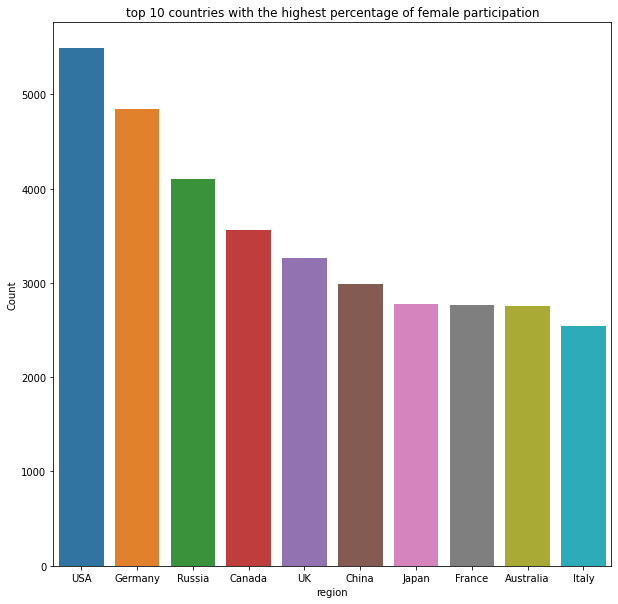

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='region',y='Count',data=female_pop_highest.head(10))
plt.title("top 10 countries with the highest percentage of female participation")
plt.show()

# **How has United States Performed over the years ?**

In [ ]:
df_usa=df[df.Team=="United States"]

df_usa_participation=df_usa.groupby(['Year'])['Name'].count().reset_index(name="Count").sort_values('Count',ascending=False)
df_usa_participation.head()

,Year,Count
22,1992,936
21,1988,886
24,1996,827
2,1904,823
20,1984,821


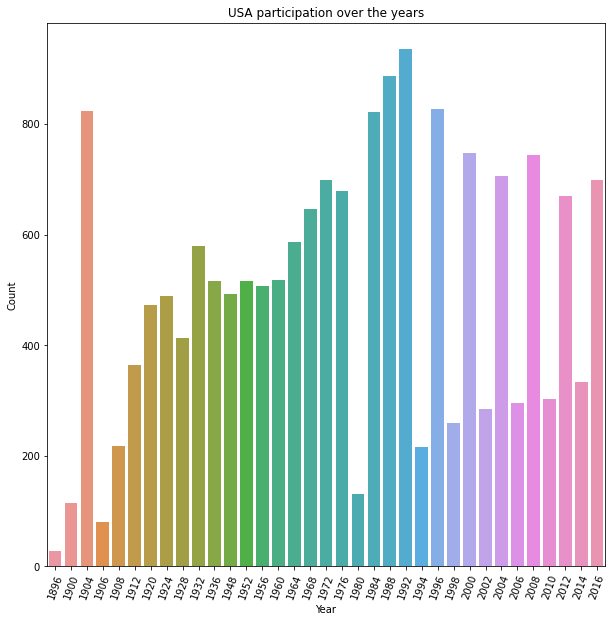

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x="Year",y="Count",data=df_usa_participation)
plt.title("USA participation over the years")
plt.xticks(rotation=70)
plt.show()

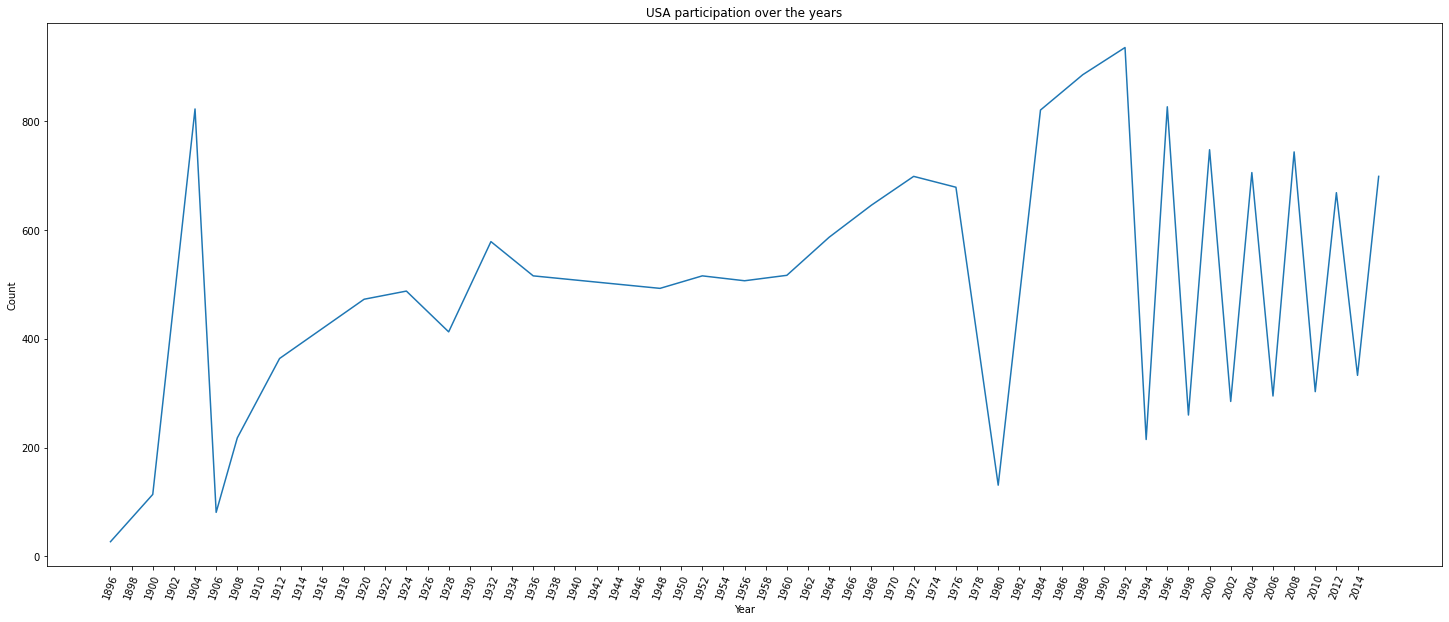

In [ ]:
plt.figure(figsize=(25,10))
sns.lineplot(x="Year",y="Count",data=df_usa_participation)
plt.title("USA participation over the years")
plt.xticks(rotation=70)
plt.xticks(np.arange(1896,2016,2))

plt.show()


# **Count of Male and Female Participants**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


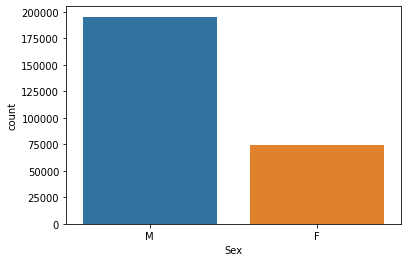

In [ ]:
sns.countplot(df['Sex'])

In [ ]:
gender_counts=df.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7fcb13b99e10>,
 [Text(-0.7124232289833484, 0.83812477758681, 'M'),
  Text(0.7124232289833479, -0.8381247775868104, 'F')],
 [Text(-0.3885944885363718, 0.45715896959280544, '72.4%'),
  Text(0.3885944885363715, -0.4571589695928056, '27.6%')])

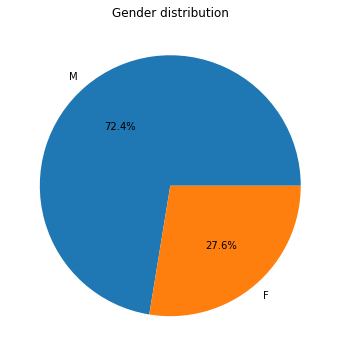

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Gender distribution")
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')


# **Female Particpation over the years**

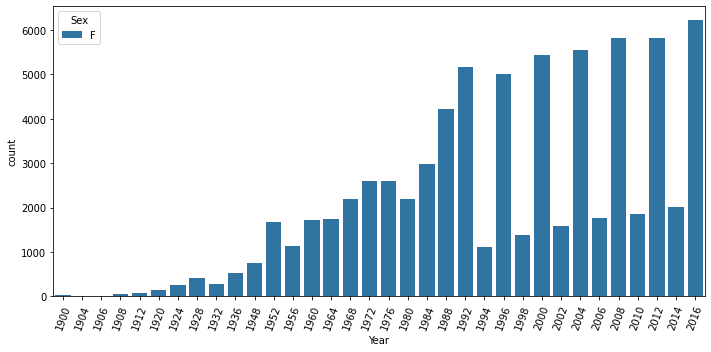

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=female_df, x='Year', hue='Sex')
plt.xticks(rotation=70)
plt.tight_layout()

# **Participation of Male and Female Partcipants over the years** 

In [ ]:
male_df = df[df.Sex=="M"]

male_participation=male_df.groupby(['Year'])['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False)
female_participation=female_df.groupby(['Year'])['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False)


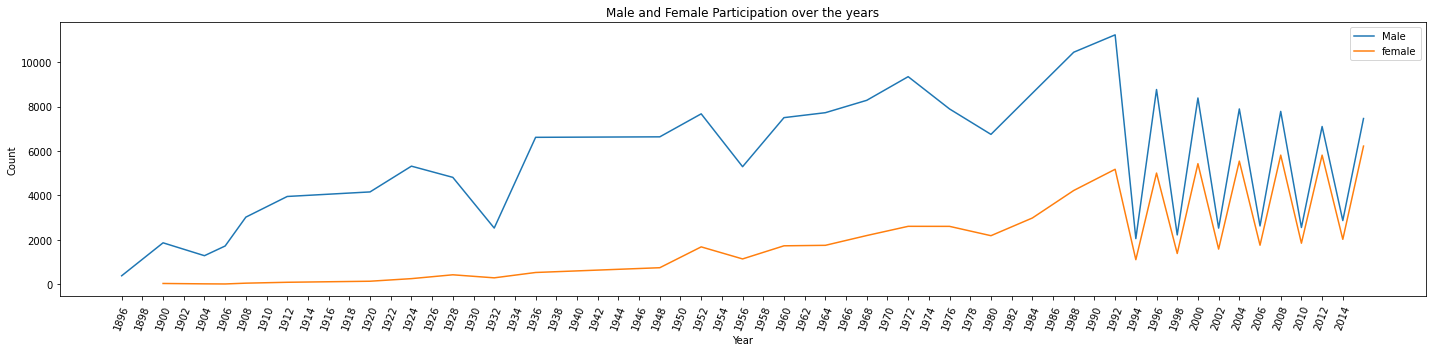

In [ ]:
plt.figure(figsize=(20,5))

sns.lineplot(x="Year",y="Count",data=male_participation,label="Male")
sns.lineplot(x="Year",y="Count",data=female_participation,label="female")

plt.title("Male and Female Participation over the years")
plt.xticks(np.arange(1896,2016,2))
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# **What sport do women Participate in the most?**

In [ ]:
female_sport=female_df.groupby(['Sport'])['Name'].count().reset_index(name="participants").sort_values("participants",ascending=False)
female_sport.head()

,Sport,participants
4,Athletics,11666
42,Swimming,9850
23,Gymnastics,9129
0,Alpine Skiing,3398
13,Cross Country Skiing,3385


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

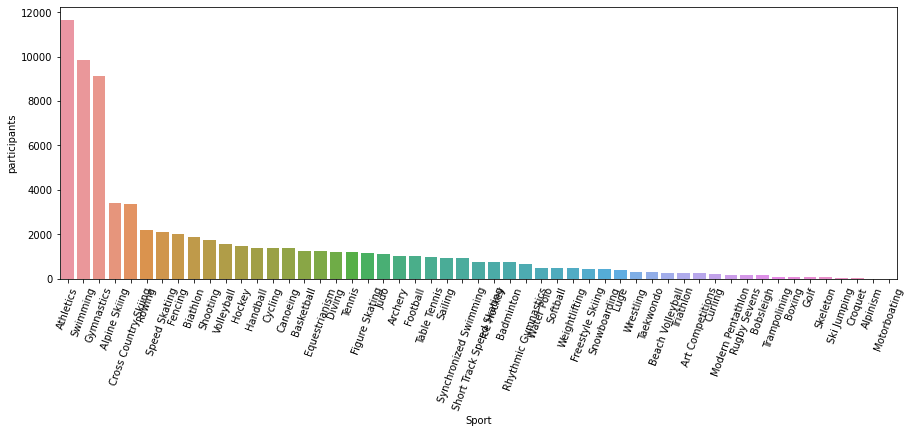

In [ ]:
plt.figure(figsize=(15,5))

sns.barplot(x="Sport",y="participants",data=female_sport)
plt.xticks(rotation=70)


([<matplotlib.patches.Wedge at 0x7fcb139c0890>,
 [Text(-0.9130619357742167, 0.6134475539442963, 'Athletics'),
  Text(-0.3837891290870777, -1.0308762798680462, 'Swimming'),
  Text(1.0391573135722763, -0.3607659596597914, 'Gymnastics'),
  Text(0.8289232728246161, 0.7231087108932703, 'Alpine Skiing'),
  Text(0.30835096097658976, 1.0558975730935334, 'Cross Country Skiing')],
 [Text(-0.4980337831495727, 0.33460775669688886, '31.2%'),
  Text(-0.2093395249565878, -0.5622961526552979, '26.3%'),
  Text(0.5668130801303324, -0.1967814325417044, '24.4%'),
  Text(0.45213996699524506, 0.39442293321451105, '9.1%'),
  Text(0.16819143325995803, 0.5759441307782909, '9.0%')])

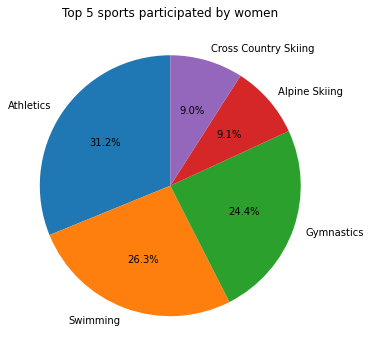

In [ ]:
plt.figure(figsize=(12,6))

plt.title("Top 5 sports participated by women")
mylabels=female_sport['Sport'].head()

plt.pie(female_sport["participants"].head(),labels=mylabels,startangle=90,autopct='%1.1f%%')